**19BCE245**

Aayush Shah

Machine Learning Practical 4

In [24]:
# Importing packages

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import matplotlib.pyplot as plt
np.random.seed(123)

In [25]:
# Loading data

X, y = datasets.load_boston(return_X_y=True)
print(f"No of data samples : {X.shape[0]}")

No of data samples : 506


In [26]:
# Splitting into training and testing datasets

M = 400                    # No. of samples in the training dataset
N = X.shape[0] - M         # No. of samples in the testing dataset
X_train, y_train = X[:M, ...], y[:M]
X_test , y_test  = X[M:, ...], y[M:]

In [27]:
# Reshaping the data

y_train, y_test = y_train[:, None], y_test[:, None]

In [28]:
# Normalizing the data
scaler = StandardScaler() # To scale the X_train and X_test datasets

# Transforming the X_train and X_test data
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [29]:
X_train = np.c_[np.ones_like(X_train[:, 0]) , X_train]
X_test  = np.c_[np.ones_like(X_test[:, 0])  , X_test ]

# Ridge Regression ($L_2$ Regularization)¶


In [30]:
# Initializing weights : 
w = np.random.randn(X_train.shape[-1], 1)

In [31]:
def ridge_loss(y, y_pred, lam, w):
    return 0.5 * np.mean((y - y_pred) ** 2) + lam * np.sum(w[1:]**2)

def ridge_loss_grad(X, y, y_pred, lam, w):
    return ((1./X.shape[0]) * X.T @ (y_pred - y) + lam * np.r_[np.zeros_like(w[:1]), w[1:]])

In [32]:
# Training : 
import time
import sys

epochs = 100
alpha  = 0.03
# lam    = 0.1
# train_losses = []
# test_losses  = []
# for _ in range(epochs):
#     y_pred = X_train @ w
#     w_grad = ridge_loss_grad(X_train, y_train, y_pred, lam, w)
#     w = w - alpha * w_grad
#     sys.stdout.write(f"\rEpochs : {_}, loss_train : {ridge_loss(y_train, y_pred, lam, w):.4f}, loss_test : {ridge_loss(y_test, X_test @ w, lam, w):.4f}")
#     train_losses.append(ridge_loss(y_train, y_pred, lam, w))
#     test_losses.append(ridge_loss(y_test, X_test @ w, lam, w))
#     time.sleep(0.05)

Epochs : 99, loss_train : 38.3418, loss_test : 31.1104

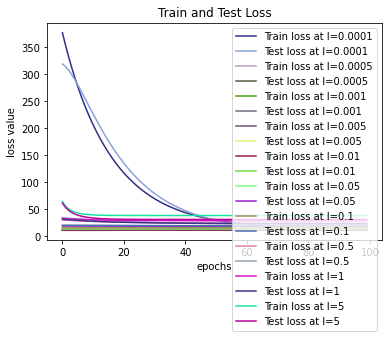

In [33]:
import matplotlib.pyplot as plt
import numpy

lamdas = [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]
for lam in lamdas:
  train_losses = []
  test_losses  = []
  for _ in range(epochs):
      y_pred = X_train @ w
      w_grad = ridge_loss_grad(X_train, y_train, y_pred, lam, w)
      w = w - alpha * w_grad
      sys.stdout.write(f"\rEpochs : {_}, loss_train : {ridge_loss(y_train, y_pred, lam, w):.4f}, loss_test : {ridge_loss(y_test, X_test @ w, lam, w):.4f}")
      train_losses.append(ridge_loss(y_train, y_pred, lam, w))
      test_losses.append(ridge_loss(y_test, X_test @ w, lam, w))
      time.sleep(0.05)
  plt.plot(train_losses, color=numpy.random.rand(3,), label=f"Train loss at l={lam}")
  plt.plot(test_losses, color=numpy.random.rand(3,), label=f"Test loss at l={lam}")
plt.title("Train and Test Loss")
plt.xlabel("epochs")
plt.ylabel("loss value")
plt.legend()
plt.show()

In [34]:
# plt.plot(train_losses, color='r', label="Train loss")
# plt.plot(test_losses, color='g', label="Test loss")
# plt.title("Train and Test Loss")
# plt.xlabel("epochs")
# plt.ylabel("loss value")
# plt.legend()
# plt.show()

# Ridge Regression using Normal Equations : 

In [35]:
lam = .1
side_mat = lam * np.eye(X_train.shape[-1])
side_mat[0, 0] = 0
try:
    w_hat = np.linalg.solve((X_train.T @ X_train + side_mat), X_train.T @ y_train)
    y_train_hat = X_train @ w_hat
    y_test_hat  = X_test  @ w_hat
    print(f"Best train loss for Ridge Regression with lambda={lam} : {ridge_loss(y_train, y_train_hat, lam, w_hat)}")
    print(f"Best test  loss for Ridge Regression with lambda={lam} : {ridge_loss(y_test, y_test_hat, lam, w_hat)}")
except:
    print("Training matrix not invertible!!!")

Best train loss for Ridge Regression with lambda=0.1 : 16.67322284771612
Best test  loss for Ridge Regression with lambda=0.1 : 24.444776537019905


In [36]:
def loss(y, y_pred):
    return 0.5 * np.mean((y - y_pred)[..., 0] ** 2, axis=-1)

In [37]:
min_lam = 0.
max_lam = 200.
num_lam = 500

lams = np.linspace(min_lam, max_lam, num=num_lam)[:, np.newaxis, np.newaxis]

side_mat = lams * np.eye(X_train.shape[-1])
side_mat[..., 0, 0] = 0

w_hat = np.linalg.solve(X_train.T @ X_train + side_mat,
                        np.repeat((X_train.T @ y_train).T, lams.size, axis=0))

w_hat = w_hat[..., None]

y_train_hat = X_train @ w_hat
y_test_hat  = X_test  @ w_hat

train_losses = loss(y_train, y_train_hat)
test_losses  = loss(y_test, y_test_hat)

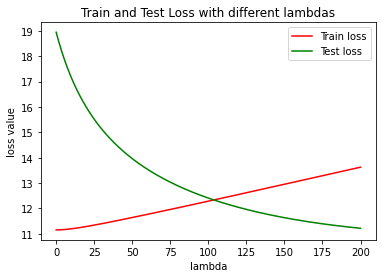

In [38]:
plt.plot(lams[..., 0, 0], train_losses, color='r', label="Train loss")
plt.plot(lams[..., 0, 0], test_losses, color='g', label="Test loss")
plt.title("Train and Test Loss with different lambdas")
plt.xlabel("lambda")
plt.ylabel("loss value")
plt.legend()
plt.show()

#Lasso Regression ($L_1$ Regularization)¶


In [39]:
# Let's initialize our weights
w = np.random.randn(X_train.shape[-1], 1)

In [40]:
def lasso_loss(y, y_pred, lam, w):
    return 0.5 * np.mean((y - y_pred) ** 2) + lam * np.sum(np.abs(w[1:]))

def lasso_loss_grad(X, y, y_pred, lam, w):
    return ((1./X.shape[0]) * X.T @ (y_pred - y) +
            lam * np.r_[np.zeros_like(w[:1]), np.ones_like(w[1:])])

In [41]:
# Training : 
import time
import sys

epochs = 100
alpha  = 0.03
lam    = 0.1
train_losses = []
test_losses  = []
for _ in range(epochs):
    y_pred = X_train @ w
    w_grad = lasso_loss_grad(X_train, y_train, y_pred, lam, w)
    w = w - alpha * w_grad
    sys.stdout.write(f"\rEpochs : {_}, loss_train : {lasso_loss(y_train, y_pred, lam, w):.4f}, loss_test : {lasso_loss(y_test, X_test @ w, lam, w):.4f}")
    train_losses.append(lasso_loss(y_train, y_pred, lam, w))
    test_losses.append(lasso_loss(y_test, X_test @ w, lam, w))
    time.sleep(0.05)

Epochs : 99, loss_train : 14.3777, loss_test : 10.4649

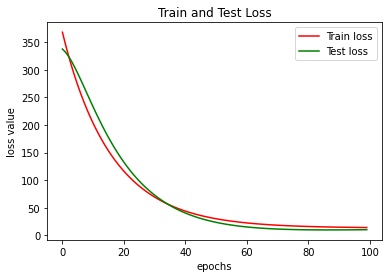

In [42]:
import matplotlib.pyplot as plt

plt.plot(train_losses, color='r', label="Train loss")
plt.plot(test_losses, color='g', label="Test loss")
plt.title("Train and Test Loss")
plt.xlabel("epochs")
plt.ylabel("loss value")
plt.legend()
plt.show()